## Kaggle: Red Wine EDA
### Author: Zach Palmer
### Work Period: 12/15 - TBD 

### Environment Setup

In [1]:
# import packages and setup environment

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

### Read Data and Provide a Quick Overview of its Contents

In [5]:
wine_df = pd.read_csv("winequality-red.csv")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# describe() prints the summary statistics of all numeric columns
wine_df.describe()

In [11]:
# info prints the data types, missing values, and data size of a DataFrame
wine_df.info(show_counts = True, memory_usage = True, verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# get the number of rows and columns
wine_df.shape

In [17]:
# check for null values

# by column
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
# total sum
wine_df.isnull().sum().sum()

# if we needed to remove missing values we could use 
# wine_df = wine_df.dropna() to remove them

# we could also replace the missing values with the mean for the respective column

# get the mean of ph
# pH_mean = wine_df['pH'].mean()

# fill the missing values using .fillna()
# wine_df = wine_df.fillna(pH_mean)

0

In [6]:
# head() and tail() print the start and end of the dataframe respectively 
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_df.tail()

In [ ]:
# if we needed to rename columns, we can use .rename() to alter the DataFrame
# wine_df.rename(columns = {'quality':'grade'}, inplace = True)

# we could also directly assign the column titles using a list
# wine_df.columns = [. . .]

### Initial Exploratory Data Analysis (EDA)

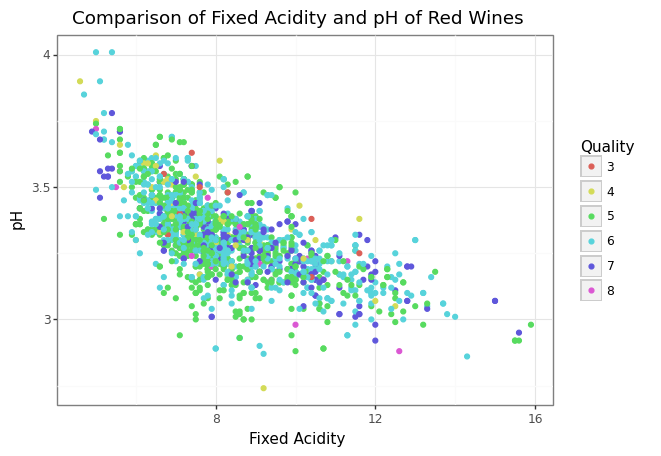

<ggplot: (139025823702)>

In [7]:
(ggplot(wine_df, aes('fixed acidity', 'pH', color = 'factor(quality)'))
 + geom_point() 
 + theme_bw() +
 labs(title = 'Comparison of Fixed Acidity and pH of Red Wines', 
      x = 'Fixed Acidity', y = 'pH', color = 'Quality'))